<a href="https://colab.research.google.com/github/pramod1997/Deep_Learning_Assignments/blob/master/DL_Assgn_1_Ques_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# this is the solution to ques3 for assgn1 in DL using KERAS
# Used 1 lstm layer 
# Multilable classification in Keras on Text
# The model is constrained because of the limitation specified in the question 
# Not the best model possible.

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# location of the dataset 

train = '/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q3_Dataset'

In [0]:
# imports 
import pandas as pd
import numpy as np

In [0]:
# read csv

train_df = pd.read_csv('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q3_Dataset/mrdata.tsv',sep='\t')

In [5]:
train_df.head(20)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [6]:
len(train_df)

156060

In [0]:
### grouping sentences by sentence id  and then taking only first sentence out of this

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


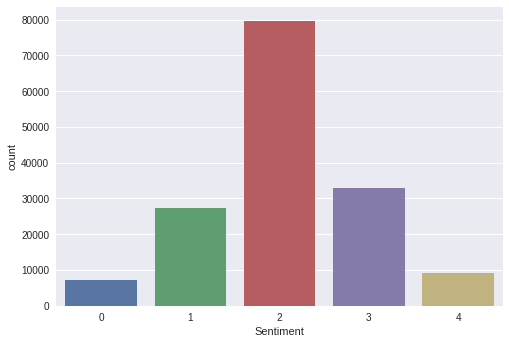

In [8]:
import seaborn as sns
sns.countplot(train_df.Sentiment)   ### clearly shows imbalance in the dataset 

In [9]:
train_df.isnull().sum()  ### no null values

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [0]:
## next steps : 
## create a vocab --> consider only top x values 
### drop stop words 
### split the data
### TOKENIZE and create vector represenation.


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:

from nltk.corpus import stopwords

stopwords_list = set(stopwords.words('english'))




In [13]:
train_df.Phrase[:5]

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
Name: Phrase, dtype: object

In [0]:
## if in the phrase the stopword exist remove the phrase

train_df['Phrase']= train_df['Phrase'].apply(lambda x: " ".join([ item.lower() for item in x.split(' ') if item.lower() not in stopwords_list]))

In [15]:
train_df.Phrase[:5]   ## the effect of removal of stop words from the text 

0    series escapades demonstrating adage good goos...
1      series escapades demonstrating adage good goose
2                                               series
3                                                     
4                                               series
Name: Phrase, dtype: object

In [16]:
train_df.head()  ##3 few emoty '' phrase columns are left.

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,2,1,series escapades demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2


In [0]:
### dropping rows with empty values 
train_df.dropna(inplace = True, axis = 0 )

In [18]:
train_df.iloc[3]

PhraseId      4
SentenceId    1
Phrase         
Sentiment     2
Name: 3, dtype: object

In [0]:
## replace empty  value with np.nan and then remove it 
train_df['Phrase'].replace('',np.nan, inplace = True)




In [0]:
train_df.dropna(subset = ['Phrase'], inplace  = True)

In [21]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,2,1,series escapades demonstrating adage good goose,2
2,3,1,series,2
4,5,1,series,2
5,6,1,escapades demonstrating adage good goose,2


In [22]:
### keras model and necessary imports 
import keras 
from keras.models import Sequential
from keras.layers import Dense , Embedding , SpatialDropout1D , LSTM
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences



Using TensorFlow backend.


In [0]:
###usig Tokenizer on Text 
max_features = 20000   ### 50000 uniqiue words I will consider 

tokenizer = Tokenizer(num_words = max_features , split = ' ')
tokenizer.fit_on_texts(train_df['Phrase'].values)
X = tokenizer.texts_to_sequences(train_df['Phrase'].values)
X = pad_sequences(X)

In [0]:
Y = train_df.Sentiment

### do a one hot encoding of Y
Y = keras.utils.to_categorical(Y)


In [0]:
# test train_split 
from sklearn.model_selection  import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 ,random_state = 39)


In [26]:
X_train.shape, Y_train.shape

((124200, 33), (124200, 5))

In [0]:
### now the model is constrained because of the question given in assignment 

In [27]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features , embed_dim  , input_length = X.shape[1]))   
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out , dropout =0.2 , recurrent_dropout = 0.2))
model.add(Dense(5, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss = 'categorical_crossentropy',
             metrics  = ['accuracy'],
             optimizer = 'adam')

In [29]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 128)           2560000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 33, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 985       
Total params: 2,815,785
Trainable params: 2,815,785
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,Y_train,epochs = 15)

Epoch 1/15
124200/124200 [==============================] - 357s 3ms/step - loss: 0.9747 - acc: 0.6051
Epoch 2/15
124200/124200 [==============================] - 352s 3ms/step - loss: 0.8075 - acc: 0.6708
Epoch 3/15
124200/124200 [==============================] - 352s 3ms/step - loss: 0.7463 - acc: 0.6935
Epoch 4/15
124200/124200 [==============================] - 350s 3ms/step - loss: 0.7016 - acc: 0.7111
Epoch 5/15
124200/124200 [==============================] - 349s 3ms/step - loss: 0.6666 - acc: 0.7257
Epoch 6/15
124200/124200 [==============================] - 352s 3ms/step - loss: 0.6391 - acc: 0.7359
Epoch 7/15
124200/124200 [==============================] - 353s 3ms/step - loss: 0.6163 - acc: 0.7444
Epoch 8/15
124200/124200 [==============================] - 352s 3ms/step - loss: 0.5959 - acc: 0.7522
Epoch 9/15
124200/124200 [==============================] - 354s 3ms/step - loss: 0.5791 - acc: 0.7586
Epoch 10/15
124200/124200 [==============================] - 356s 3ms/ste

In [32]:
model.evaluate(X_test , Y_test)

31051/31051 [==============================] - 31s 1ms/step


[1.0060133570223622, 0.6462915848159225]

In [0]:
#### certain improvements in the model  
### need to lessen the vocab 
### need to put a threshold on phrase if the phrase len is less than 2 dont consider that record 

In [0]:
model.save('q3.h5')